## Question-1.
#### Download the fashion-MNIST dataset and plot 1 sample image for each class as shown in the grid below.

* Importing the neccesary libraries.

In [27]:
!pip install wandb -qU

In [28]:
# Log in to your W&B account
import wandb
import random
import math

In [31]:
wandb.login()

True

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

* Loading the dataset

In [33]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [11]:
y_train.shape

(60000,)

* Class labels of the sample images

In [12]:
class_labels=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

* Using a for loop to get one sample per class and storing the images and the labels in two lists

In [34]:
sample_img=[]
sample_labels=[]
for i in range(len(class_labels)):
    index = np.argmax(y_train == i)
    # index =np.where(y_train==i)[0][0]
    sample_img.append(x_train[index])
    sample_labels.append(class_labels[i])

In [14]:
print(len(sample_labels))
print(len(sample_img))

10
10


* Plotting 1 sample image of each class

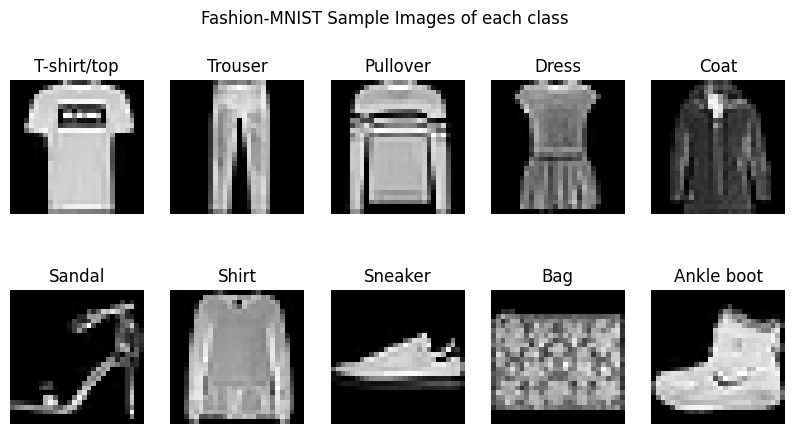

In [18]:
import wandb
# import matplotlib.pyplot as plt

# Initialize a W&B run
# wandb.init(project="fashion-mnist-visualization", name="sample-images")
run=wandb.init(
      # Set the project where this run will be logged
      project="MA24M021_Deep_learning_Assignment_1",
      mode='disabled')
# Create the plot
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
fig.suptitle("Fashion-MNIST Sample Images of each class", fontsize=12)

# Plot the images
for i, ax in enumerate(axes.flat):
    ax.imshow(sample_img[i], cmap='gray')
    ax.set_title(sample_labels[i])
    ax.axis('off')

# Log the plot to W&B
run.log({"Fashion-MNIST Sample Images": wandb.Image(fig)})

# Show the plot (optional)
plt.show()

# Finish the W&B run
run.finish()

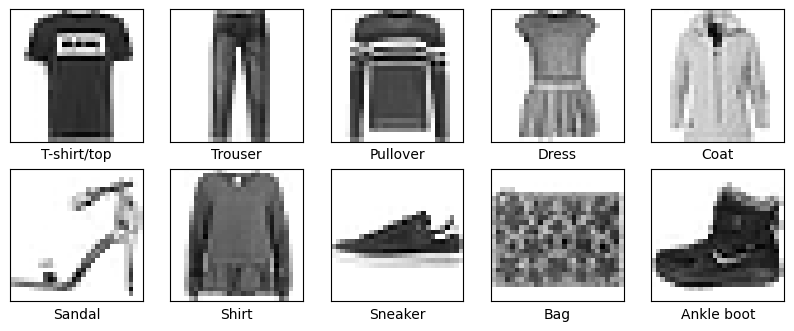

In [20]:
import wandb
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

# Initialize W&B
wandb.login()
wandb.init(project="MA24M021_Deep_learning_Assignment_1", mode="disabled")


# Load Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Labeling the dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Select 10 sample images for W&B logging
wandb_images = []
plt.figure(figsize=(10, 10))
for label in range(10):
    idx = np.where(y_train == label)[0][0]  # Find first index of each label
    sample_image = X_train[idx]

    # Log image to W&B
    wandb_images.append(wandb.Image(sample_image, caption=class_names[label]))

    # Display locally
    plt.subplot(5, 5, label + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sample_image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])

# Show images locally
plt.show()

# Log images to W&B
wandb.log({"fashion_mnist_samples": wandb_images})

# Finish W&B run
wandb.finish()

## Question-2
##### Implement a feedforward neural network which takes images from the fashion-mnist data as input and outputs a probability distribution over the 10 classes.

#### Initialization of weights and biases

In [8]:
def init_weights(layers):
    np.random.seed(0)
    weights ={}
    biases ={}
    for i in range(len(layers)-1):
        weights[i] = np.random.randn(layers[i],layers[i+1])
        biases[i] = np.zeros((1,layers[i+1]))
    return weights, biases

1. Sigmoid has been used as an activation.
2. Derivative of the sigmoid function
3. Softmax function as an output layer activation function layer neuron for computing the probabilities of the 10 classes

* These three functions is defined below:

In [9]:
def sigmoid(z):
  return 1/(1+ np.exp(-z))

def Derivative_of_Sigmoid(z):
  return sigmoid(z)*(1-sigmoid(z))

def softmax(z):
  return  np.exp(z)/np.sum(np.exp(z),axis=0)

#### Forward propagation:
* here "layers" is a list. length of the list is the number of layers and the value in each list element have, denotes the number of neurons.

In [10]:
def forward_NN(X,weights,biases,layers):
    activations={0:X}
    for i in range(len(layers)-2):
        X = sigmoid(np.dot(X,weights[i])+ biases[i])
        activations[i+1] = X
    output = softmax(np.dot(X,weights[len(layers)-2])+ biases[len(layers)-2])
    activations[len(layers)-1] = output
    return activations

#### Backpropagation(Gradient Descent)

In [11]:
def backward_NN(X,y,activations,weights,biases,layers,learning_rate):
    grads ={}
    L =len(layers)-1
    m = X.shape[0]
    dZ = activations[L] - y
    for i in reversed(range(L)):
        grads[f'dw{i}'] = np.dot(activations[i].T,dZ)/m
        grads[f'db{i}'] = np.sum(dZ,axis=0,keepdims=True)/m
        if i >0:
            dA= np.dot(dZ,weights[i].T)
            dZ = dA*Derivative_of_Sigmoid(activations[i])
    for i in range(L):
        weights[i] -= learning_rate*grads[f'dw{i}']
        biases[i] -= learning_rate*grads[f'db{i}']
    return weights,biases

#### Training the Neural-Network and Prediction:

In [12]:
import numpy as np

def train_NN_vanilla(X_train, y_train, layers, learning_rate=0.01, epochs=10):
    """
    Train a neural network using Vanilla (Full-Batch) Gradient Descent.

    Parameters:
        X_train (numpy array): Training data (features).
        y_train (numpy array): Training labels (one-hot encoded).
        layers (list): List containing number of neurons in each layer.
        learning_rate (float): Step size for weight updates.
        epochs (int): Number of iterations over the entire dataset.

    Returns:
        Updated weights and biases after training.
    """
    weights, biases = init_weights(layers)  # Initialize weights and biases

    for epoch in range(epochs):
        # Forward pass on entire dataset
        activations = forward_NN(X_train, weights, biases, layers)

        # Backward pass (Compute gradients for full dataset)
        weights, biases = backward_NN(X_train, y_train, activations, weights, biases, layers, learning_rate)

        # Compute loss & accuracy after weight update
        y_pred = predict_NN(X_train, weights, biases, layers)  # Predictions on entire dataset
        loss = -np.mean(y_train * np.log(y_pred + 1e-8))  # Cross-entropy loss
        acc = np.mean(np.argmax(y_train, axis=1) == np.argmax(y_pred, axis=1))  # Accuracy

        print(f"Epoch {epoch+1}/{epochs} | Loss: {loss:.4f} | Accuracy: {acc:.4f}")

    return weights, biases


In [13]:
def predict_NN(X, weights, biases, layers):
    return forward_NN(X, weights, biases, layers)[len(layers) - 1]

#### Evaluation

In [14]:
def evaluate_nn(X_test, y_test, weights, biases, layers):
    y_pred = predict_NN(X_test, weights, biases, layers)
    accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1))
    print(f"Test Accuracy: {accuracy:.4f}")

#### Preparing the data for training and making prediction:

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.datasets import fashion_mnist

# Load Fashion-MNIST dataset from Keras
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values (scale to [0,1])
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten images (convert 28x28 to 784)
X_train = x_train.reshape(x_train.shape[0], -1)
X_test = x_test.reshape(x_test.shape[0], -1)

# One-hot encode labels
# Remove 'sparse=False' or upgrade scikit-learn
ohe = OneHotEncoder(sparse_output=False,categories='auto') # For older versions, remove sparse or set categories='auto'
#ohe = OneHotEncoder(sparse_output=False)  # For scikit-learn >= 1.2 use sparse_output
y_train = ohe.fit_transform(y_train.reshape(-1, 1))
y_test = ohe.transform(y_test.reshape(-1, 1))

# Split dataset (optional, if you want a validation set)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Print dataset shapes
print("Train shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", x_test.shape, y_test.shape)

Train shape: (54000, 784) (54000, 10)
Validation shape: (6000, 784) (6000, 10)
Test shape: (10000, 28, 28) (10000, 10)


* Define the network layers, training and evalution

In [17]:
layers = [784, 2, 2, 10]
weights, biases = train_NN_vanilla(X_train, y_train, layers, epochs=10, learning_rate=0.01)

# Evaluate on test data
evaluate_nn(X_test, y_test, weights, biases, layers)

Epoch 1/10 | Loss: 1.0894 | Accuracy: 0.0446
Epoch 2/10 | Loss: 1.0894 | Accuracy: 0.0447
Epoch 3/10 | Loss: 1.0894 | Accuracy: 0.0447
Epoch 4/10 | Loss: 1.0894 | Accuracy: 0.0448
Epoch 5/10 | Loss: 1.0894 | Accuracy: 0.0449
Epoch 6/10 | Loss: 1.0893 | Accuracy: 0.0449
Epoch 7/10 | Loss: 1.0893 | Accuracy: 0.0449
Epoch 8/10 | Loss: 1.0893 | Accuracy: 0.0450
Epoch 9/10 | Loss: 1.0893 | Accuracy: 0.0450
Epoch 10/10 | Loss: 1.0893 | Accuracy: 0.0451
Test Accuracy: 0.0428


Q3. Implement the backpropagation algorithm with support for the following optimisation functions

* sgd
* momentum based gradient descent
* nesterov accelerated gradient descent
* rmsprop
* adam
* nadam
(12 marks for the backpropagation framework and 2 marks for each of the optimisation algorithms above)

We will check the code for implementation and ease of use (e.g., how easy it is to add a new optimisation algorithm such as Eve). Note that the code should be flexible enough to work with different batch sizes.

* stochastic gradient descent

In [18]:
import numpy as np

def backward_NN_SGD(X, y, activations, weights, biases, layers, learning_rate):
    """
    Stochastic Gradient Descent (SGD) Backpropagation for Neural Networks.
    Updates weights after each training example instead of the entire batch.

    Parameters:
        X (numpy array): Training data (one example at a time).
        y (numpy array): Corresponding one-hot encoded label.
        activations (dict): Forward propagation activations.
        weights (dict): Neural network weights.
        biases (dict): Neural network biases.
        layers (list): Layer structure.
        learning_rate (float): Step size for weight updates.

    Returns:
        Updated weights and biases after one sample update.
    """
    grads = {}
    L = len(layers) - 1  # Number of layers

    # Forward pass already stored activations, compute final layer gradient
    dZ = activations[L] - y

    # Backpropagation loop (for each layer)
    for i in reversed(range(L)):
        grads[f'dw{i}'] = np.dot(activations[i].T, dZ)  # No division by m since m=1 in SGD
        grads[f'db{i}'] = np.sum(dZ, axis=0, keepdims=True)

        if i > 0:
            dA = np.dot(dZ, weights[i].T)
            dZ = dA * Derivative_of_Sigmoid(activations[i])  # Element-wise multiplication

        # Update weights & biases immediately after each sample (SGD property)
        weights[i] -= learning_rate * grads[f'dw{i}']
        biases[i] -= learning_rate * grads[f'db{i}']

    return weights, biases



* Training the neural-net with stochastic gradient descent

In [19]:
def train_NN(X_train, y_train, layers, learning_rate=0.01,optimizer=backward_NN_SGD, epochs=10):
    weights, biases = init_weights(layers)
    # weights, biases = init_weights(layers)
    velocity = {i: np.zeros_like(weights[i]) for i in weights}
    for i in range(epochs):
        activations = forward_NN(X_train,weights,biases,layers)
        weights, biases = optimizer(X_train, y_train, activations, weights, biases, layers, learning_rate=learning_rate)
        y_pred = predict_NN(X_train, weights, biases, layers)
        loss = -np.mean(y_train*np.log(y_pred+1e-8))
        acc = np.mean(np.argmax(y_train, axis=1) == np.argmax(y_pred, axis=1))
        print(f"Epoch {i+1}/{epochs} loss: {loss:.2f} accuracy: {acc:.2f}")
    return weights, biases

In [20]:
layers = [784, 2, 2, 10]
weights, biases = train_NN(X_train, y_train, layers, epochs=10, learning_rate=0.01)

# Evaluate on test data
evaluate_nn(X_test, y_test, weights, biases, layers)

<ipython-input-9-2f8554132f16>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+ np.exp(-z))


Epoch 1/10 loss: 1.09 accuracy: 0.10
Epoch 2/10 loss: 1.09 accuracy: 0.10
Epoch 3/10 loss: 1.09 accuracy: 0.10
Epoch 4/10 loss: 1.09 accuracy: 0.10


<ipython-input-9-2f8554132f16>:8: RuntimeWarning: overflow encountered in exp
  return  np.exp(z)/np.sum(np.exp(z),axis=0)
<ipython-input-9-2f8554132f16>:8: RuntimeWarning: invalid value encountered in divide
  return  np.exp(z)/np.sum(np.exp(z),axis=0)


Epoch 5/10 loss: nan accuracy: 0.10
Epoch 6/10 loss: nan accuracy: 0.10
Epoch 7/10 loss: nan accuracy: 0.10
Epoch 8/10 loss: nan accuracy: 0.10
Epoch 9/10 loss: nan accuracy: 0.10
Epoch 10/10 loss: nan accuracy: 0.10
Test Accuracy: 0.1000


* Momentum gradient descent

In [36]:
import numpy as np

def backward_NN_MomentumGD(X, y, activations, weights, biases, velocity_w, velocity_b, layers, learning_rate=0.01, beta=0.9):
    """
    Momentum-Based Gradient Descent (Full-Batch) Backpropagation for Neural Networks.
    Updates both weights and biases using the momentum update rule.

    Parameters:
        X (numpy array): Full training dataset (features).
        y (numpy array): Corresponding one-hot encoded labels.
        activations (dict): Forward propagation activations.
        weights (dict): Neural network weights.
        biases (dict): Neural network biases.
        velocity_w (dict): Velocity terms for weight updates.
        velocity_b (dict): Velocity terms for bias updates.
        layers (list): List of layer sizes.
        learning_rate (float): Step size for weight updates.
        beta (float): Momentum coefficient (0 ≤ β < 1).

    Returns:
        Updated weights, biases, velocity_w, and velocity_b.
    """
    grads = {}
    L = len(layers) - 1  # Number of layers
    m = X.shape[0]  # Number of training samples

    # Compute output layer gradient
    dZ = activations[L] - y

    # Backpropagation loop (for each layer)
    for i in reversed(range(L)):
        grads[f'dw{i}'] = np.dot(activations[i].T, dZ) / m  # Gradient for weights
        grads[f'db{i}'] = np.sum(dZ, axis=0, keepdims=True) / m  # Gradient for biases

        if i > 0:
            dA = np.dot(dZ, weights[i].T)
            dZ = dA * Derivative_of_Sigmoid(activations[i])  # Element-wise multiplication

        # Apply Momentum Update Rule to Weights
        velocity_w[i] = beta * velocity_w[i] + grads[f'dw{i}']  # Compute velocity for weights
        weights[i] -= learning_rate * velocity_w[i]  # Update weights

        # Apply Momentum Update Rule to Biases
        velocity_b[i] = beta * velocity_b[i] + grads[f'db{i}']  # Compute velocity for biases
        biases[i] -= learning_rate * velocity_b[i]  # Update biases

    return weights, biases, velocity_w, velocity_b


In [39]:
import numpy as np

def train_NN_MomentumGD(X_train, y_train, layers, learning_rate=0.01, beta=0.9, epochs=10):
    """
    Train a neural network using Momentum-Based Gradient Descent (Full-Batch).

    Parameters:
        X_train (numpy array): Training data (features).
        y_train (numpy array): Training labels (one-hot encoded).
        layers (list): List containing the number of neurons in each layer.
        learning_rate (float): Step size for weight updates.
        beta (float): Momentum coefficient (0 ≤ β < 1).
        epochs (int): Number of iterations over the entire dataset.

    Returns:
        Updated weights and biases after training.
    """
    # Initialize weights, biases, and velocity for Momentum GD
    weights, biases = init_weights(layers)
    velocity_w = {i: np.zeros_like(weights[i]) for i in weights}  # Velocity for weights
    velocity_b = {i: np.zeros_like(biases[i]) for i in biases}  # Velocity for biases

    for epoch in range(epochs):
        # Forward pass on entire dataset
        activations = forward_NN(X_train, weights, biases, layers)

        # Backward pass using Momentum-Based Gradient Descent
        weights, biases, velocity_w, velocity_b = backward_NN_MomentumGD(
            X_train, y_train, activations, weights, biases, velocity_w, velocity_b, layers, learning_rate, beta)

        # Compute loss & accuracy after weight update
        y_pred = predict_NN(X_train, weights, biases, layers)  # Predictions on entire dataset
        loss = -np.mean(y_train * np.log(y_pred + 1e-8))  # Cross-entropy loss
        acc = np.mean(np.argmax(y_train, axis=1) == np.argmax(y_pred, axis=1))  # Accuracy

        print(f"Epoch {epoch+1}/{epochs} | Loss: {loss:.4f} | Accuracy: {acc:.4f}")

    return weights, biases


In [40]:
layers = [784, 2, 2, 10]
weights, biases = train_NN_MomentumGD(X_train, y_train, layers, epochs=10, learning_rate=0.01)

# Evaluate on test data
evaluate_nn(X_test, y_test, weights, biases, layers)

Epoch 1/10 | Loss: 1.0894 | Accuracy: 0.0446
Epoch 2/10 | Loss: 1.0894 | Accuracy: 0.0447
Epoch 3/10 | Loss: 1.0893 | Accuracy: 0.0449
Epoch 4/10 | Loss: 1.0893 | Accuracy: 0.0450
Epoch 5/10 | Loss: 1.0893 | Accuracy: 0.0452
Epoch 6/10 | Loss: 1.0893 | Accuracy: 0.0454
Epoch 7/10 | Loss: 1.0892 | Accuracy: 0.0456
Epoch 8/10 | Loss: 1.0892 | Accuracy: 0.0459
Epoch 9/10 | Loss: 1.0891 | Accuracy: 0.0462
Epoch 10/10 | Loss: 1.0891 | Accuracy: 0.0466
Test Accuracy: 0.0449


* nesterov

In [44]:
import numpy as np

def backward_NN_NAG(X, y, activations, weights, biases, velocity_w, velocity_b, layers, learning_rate=0.01, beta=0.9):
    """
    Nesterov Accelerated Gradient (NAG) Backpropagation for Neural Networks.
    Computes gradients at the look-ahead position before updating weights and biases.

    Parameters:
        X (numpy array): Full training dataset (features).
        y (numpy array): Corresponding one-hot encoded labels.
        activations (dict): Forward propagation activations.
        weights (dict): Neural network weights.
        biases (dict): Neural network biases.
        velocity_w (dict): Velocity terms for weights in momentum.
        velocity_b (dict): Velocity terms for biases in momentum.
        layers (list): List of layer sizes.
        learning_rate (float): Step size for weight updates.
        beta (float): Momentum coefficient (0 ≤ β < 1).

    Returns:
        Updated weights, biases, velocity_w, and velocity_b.
    """
    grads = {}
    L = len(layers) - 1  # Number of layers
    m = X.shape[0]  # Number of training samples

    # Compute look-ahead weights and biases
    lookahead_weights = {i: weights[i] - beta * velocity_w[i] for i in weights}
    lookahead_biases = {i: biases[i] - beta * velocity_b[i] for i in biases}

    # Forward pass with look-ahead weights and biases
    lookahead_activations = forward_NN(X, lookahead_weights, lookahead_biases, layers)

    # Compute output layer gradient
    dZ = lookahead_activations[L] - y

    # Backpropagation loop (for each layer)
    for i in reversed(range(L)):
        grads[f'dw{i}'] = np.dot(lookahead_activations[i].T, dZ) / m  # Compute gradient at look-ahead position
        grads[f'db{i}'] = np.sum(dZ, axis=0, keepdims=True) / m

        if i > 0:
            dA = np.dot(dZ, lookahead_weights[i].T)
            dZ = dA * Derivative_of_Sigmoid(lookahead_activations[i])

        # Apply Nesterov Accelerated Momentum Update Rule for Weights
        velocity_w[i] = beta * velocity_w[i] + grads[f'dw{i}']  # Compute velocity for weights
        weights[i] -= learning_rate * velocity_w[i]  # Update weights

        # Apply Nesterov Accelerated Momentum Update Rule for Biases
        velocity_b[i] = beta * velocity_b[i] + grads[f'db{i}']  # Compute velocity for biases
        biases[i] -= learning_rate * velocity_b[i]  # Update biases

    return weights, biases, velocity_w, velocity_b


In [47]:
import numpy as np

def train_NN_NAG(X_train, y_train, layers, learning_rate=0.01, beta=0.9, epochs=10):
    """
    Train a neural network using Nesterov Accelerated Gradient (NAG) optimization.

    Parameters:
        X_train (numpy array): Training data (features).
        y_train (numpy array): Training labels (one-hot encoded).
        layers (list): List containing the number of neurons in each layer.
        learning_rate (float): Step size for weight updates.
        beta (float): Momentum coefficient (0 ≤ β < 1).
        epochs (int): Number of iterations over the entire dataset.

    Returns:
        Updated weights and biases after training.
    """
    # Initialize weights, biases, and velocities for NAG
    weights, biases = init_weights(layers)
    velocity_w = {i: np.zeros_like(weights[i]) for i in weights}  # Velocity for weights
    velocity_b = {i: np.zeros_like(biases[i]) for i in biases}  # Velocity for biases

    for epoch in range(epochs):
        # Forward pass on entire dataset
        activations = forward_NN(X_train, weights, biases, layers)

        # Backward pass using Nesterov Accelerated Gradient Descent
        weights, biases, velocity_w, velocity_b = backward_NN_NAG(
            X_train, y_train, activations, weights, biases, velocity_w, velocity_b, layers, learning_rate, beta
        )

        # Compute loss & accuracy after weight update
        y_pred = predict_NN(X_train, weights, biases, layers)  # Predictions on entire dataset
        loss = -np.mean(y_train * np.log(y_pred + 1e-8))  # Cross-entropy loss
        acc = np.mean(np.argmax(y_train, axis=1) == np.argmax(y_pred, axis=1))  # Accuracy

        print(f"Epoch {epoch+1}/{epochs} | Loss: {loss:.4f} | Accuracy: {acc:.4f}")

    return weights, biases


In [48]:
layers = [784, 2, 2, 10]
weights, biases = train_NN_NAG(X_train, y_train, layers, epochs=10, learning_rate=0.01)

# Evaluate on test data
evaluate_nn(X_test, y_test, weights, biases, layers)

Epoch 1/10 | Loss: 1.0894 | Accuracy: 0.0446
Epoch 2/10 | Loss: 1.0894 | Accuracy: 0.0447
Epoch 3/10 | Loss: 1.0893 | Accuracy: 0.0448
Epoch 4/10 | Loss: 1.0893 | Accuracy: 0.0449
Epoch 5/10 | Loss: 1.0893 | Accuracy: 0.0452
Epoch 6/10 | Loss: 1.0893 | Accuracy: 0.0453
Epoch 7/10 | Loss: 1.0892 | Accuracy: 0.0455
Epoch 8/10 | Loss: 1.0892 | Accuracy: 0.0456
Epoch 9/10 | Loss: 1.0891 | Accuracy: 0.0459
Epoch 10/10 | Loss: 1.0891 | Accuracy: 0.0462
Test Accuracy: 0.0449


* RMSprop

In [23]:
import numpy as np

def backward_NN_RMSprop(X, y, activations, weights, biases, v, layers, learning_rate=0.01, beta=0.9, epsilon=1e-8):
    """
    RMSprop Backpropagation for Neural Networks.
    Uses an exponentially decaying average of past squared gradients to normalize updates.

    Parameters:
        X (numpy array): Full training dataset (features).
        y (numpy array): Corresponding one-hot encoded labels.
        activations (dict): Forward propagation activations.
        weights (dict): Neural network weights.
        biases (dict): Neural network biases.
        v (dict): Running squared gradient term for RMSprop.
        layers (list): List of layer sizes.
        learning_rate (float): Step size for weight updates.
        beta (float): Decay rate for moving average (0 ≤ β < 1).
        epsilon (float): Small constant to avoid division by zero.

    Returns:
        Updated weights, biases, and v.
    """
    grads = {}
    L = len(layers) - 1  # Number of layers
    m = X.shape[0]  # Number of training samples

    # Compute output layer gradient
    dZ = activations[L] - y

    # Backpropagation loop (for each layer)
    for i in reversed(range(L)):
        grads[f'dw{i}'] = np.dot(activations[i].T, dZ) / m  # Average gradient over all samples
        grads[f'db{i}'] = np.sum(dZ, axis=0, keepdims=True) / m

        if i > 0:
            dA = np.dot(dZ, weights[i].T)
            dZ = dA * Derivative_of_Sigmoid(activations[i])

        # RMSprop update for weights
        v[i] = beta * v[i] + (1 - beta) * (grads[f'dw{i}'] ** 2)  # Update moving average of squared gradients
        weights[i] -= learning_rate * grads[f'dw{i}'] / (np.sqrt(v[i]) + epsilon)  # Apply RMSprop update

        # RMSprop update for biases
        v[f'b{i}'] = beta * v[f'b{i}'] + (1 - beta) * (grads[f'db{i}'] ** 2)
        biases[i] -= learning_rate * grads[f'db{i}'] / (np.sqrt(v[f'b{i}']) + epsilon)  # Apply RMSprop update

    return weights, biases, v


In [24]:
import numpy as np

def train_NN_RMSprop(X_train, y_train, layers, learning_rate=0.01, optimizer=backward_NN_RMSprop, beta=0.9, epsilon=1e-8, epochs=10):
    """
    Train a neural network using RMSprop optimization.

    Parameters:
        X_train (numpy array): Training data (features).
        y_train (numpy array): Training labels (one-hot encoded).
        layers (list): List containing number of neurons in each layer.
        learning_rate (float): Step size for weight updates.
        optimizer (function): RMSprop optimizer function.
        beta (float): Decay rate for moving average (0 ≤ β < 1).
        epsilon (float): Small constant to prevent division by zero.
        epochs (int): Number of iterations over the entire dataset.

    Returns:
        Updated weights and biases after training.
    """
    # Initialize weights, biases, and RMSprop squared gradient memory (v)
    weights, biases = init_weights(layers)
    v = {i: np.zeros_like(weights[i]) for i in weights}  # For weights
    v.update({f'b{i}': np.zeros_like(biases[i]) for i in biases})  # For biases

    for epoch in range(epochs):
        # Forward pass on entire dataset
        activations = forward_NN(X_train, weights, biases, layers)

        # Backward pass using RMSprop optimizer
        weights, biases, v = optimizer(X_train, y_train, activations, weights, biases, v, layers, learning_rate, beta, epsilon)

        # Compute loss & accuracy after weight update
        y_pred = predict_NN(X_train, weights, biases, layers)  # Predictions on entire dataset
        loss = -np.mean(y_train * np.log(y_pred + 1e-8))  # Cross-entropy loss
        acc = np.mean(np.argmax(y_train, axis=1) == np.argmax(y_pred, axis=1))  # Accuracy

        print(f"Epoch {epoch+1}/{epochs} | Loss: {loss:.4f} | Accuracy: {acc:.4f}")

    return weights, biases


In [32]:
layers = [784, 2, 2, 10]
weights, biases = train_NN_RMSprop(X_train, y_train, layers, epochs=10, learning_rate=0.01)

# Evaluate on test data
evaluate_nn(X_test, y_test, weights, biases, layers)

Epoch 1/10 | Loss: 1.0872 | Accuracy: 0.1103
Epoch 2/10 | Loss: 1.0865 | Accuracy: 0.1636
Epoch 3/10 | Loss: 1.0870 | Accuracy: 0.1596
Epoch 4/10 | Loss: 1.0877 | Accuracy: 0.1328
Epoch 5/10 | Loss: 1.0882 | Accuracy: 0.1211
Epoch 6/10 | Loss: 1.0885 | Accuracy: 0.1189
Epoch 7/10 | Loss: 1.0889 | Accuracy: 0.1186
Epoch 8/10 | Loss: 1.0891 | Accuracy: 0.1171
Epoch 9/10 | Loss: 1.0893 | Accuracy: 0.1150
Epoch 10/10 | Loss: 1.0895 | Accuracy: 0.1138
Test Accuracy: 0.1138


In [49]:
import numpy as np

def backward_NN_Adam(X, y, activations, weights, biases, m_w, m_b, v_w, v_b, t, layers, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    """
    Adam Optimization for Backpropagation in Neural Networks.
    Uses momentum and adaptive learning rates.

    Parameters:
        X (numpy array): Full training dataset (features).
        y (numpy array): Corresponding one-hot encoded labels.
        activations (dict): Forward propagation activations.
        weights (dict): Neural network weights.
        biases (dict): Neural network biases.
        m_w (dict): First moment estimate (momentum) for weights.
        m_b (dict): First moment estimate (momentum) for biases.
        v_w (dict): Second moment estimate (RMSprop) for weights.
        v_b (dict): Second moment estimate (RMSprop) for biases.
        t (int): Current time step (epoch counter).
        layers (list): List of layer sizes.
        learning_rate (float): Step size for weight updates.
        beta1 (float): Exponential decay rate for first moment estimate.
        beta2 (float): Exponential decay rate for second moment estimate.
        epsilon (float): Small constant to prevent division by zero.

    Returns:
        Updated weights, biases, m_w, m_b, v_w, and v_b.
    """
    grads = {}
    L = len(layers) - 1  # Number of layers
    m = X.shape[0]  # Number of training samples

    # Compute output layer gradient
    dZ = activations[L] - y

    # Backpropagation loop (for each layer)
    for i in reversed(range(L)):
        grads[f'dw{i}'] = np.dot(activations[i].T, dZ) / m  # Compute weight gradients
        grads[f'db{i}'] = np.sum(dZ, axis=0, keepdims=True) / m  # Compute bias gradients

        if i > 0:
            dA = np.dot(dZ, weights[i].T)
            dZ = dA * Derivative_of_Sigmoid(activations[i])

        # Update biased first moment estimate (momentum)
        m_w[i] = beta1 * m_w[i] + (1 - beta1) * grads[f'dw{i}']
        m_b[i] = beta1 * m_b[i] + (1 - beta1) * grads[f'db{i}']

        # Update biased second moment estimate (RMSprop)
        v_w[i] = beta2 * v_w[i] + (1 - beta2) * (grads[f'dw{i}'] ** 2)
        v_b[i] = beta2 * v_b[i] + (1 - beta2) * (grads[f'db{i}'] ** 2)

        # Compute bias-corrected moment estimates
        m_w_hat = m_w[i] / (1 - beta1 ** t)
        m_b_hat = m_b[i] / (1 - beta1 ** t)
        v_w_hat = v_w[i] / (1 - beta2 ** t)
        v_b_hat = v_b[i] / (1 - beta2 ** t)

        # Apply Adam Update Rule
        weights[i] -= learning_rate * m_w_hat / (np.sqrt(v_w_hat) + epsilon)
        biases[i] -= learning_rate * m_b_hat / (np.sqrt(v_b_hat) + epsilon)

    return weights, biases, m_w, m_b, v_w, v_b


In [50]:
import numpy as np

def train_NN_Adam(X_train, y_train, layers, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, epochs=10):
    """
    Train a neural network using Adam Optimization.

    Parameters:
        X_train (numpy array): Training data (features).
        y_train (numpy array): Training labels (one-hot encoded).
        layers (list): List containing the number of neurons in each layer.
        learning_rate (float): Step size for weight updates.
        beta1 (float): Exponential decay rate for first moment estimate (momentum).
        beta2 (float): Exponential decay rate for second moment estimate (RMSprop).
        epsilon (float): Small constant to prevent division by zero.
        epochs (int): Number of iterations over the entire dataset.

    Returns:
        Updated weights and biases after training.
    """
    # Initialize weights, biases, and Adam optimization terms
    weights, biases = init_weights(layers)
    m_w = {i: np.zeros_like(weights[i]) for i in weights}  # First moment estimate (momentum) for weights
    m_b = {i: np.zeros_like(biases[i]) for i in biases}  # First moment estimate (momentum) for biases
    v_w = {i: np.zeros_like(weights[i]) for i in weights}  # Second moment estimate (RMSprop) for weights
    v_b = {i: np.zeros_like(biases[i]) for i in biases}  # Second moment estimate (RMSprop) for biases

    for epoch in range(1, epochs + 1):  # Adam requires t (step counter) to start from 1
        # Forward pass on entire dataset
        activations = forward_NN(X_train, weights, biases, layers)

        # Backward pass using Adam optimization
        weights, biases, m_w, m_b, v_w, v_b = backward_NN_Adam(
            X_train, y_train, activations, weights, biases, m_w, m_b, v_w, v_b, t=epoch,
            layers=layers, learning_rate=learning_rate, beta1=beta1, beta2=beta2, epsilon=epsilon
        )

        # Compute loss & accuracy after weight update
        y_pred = predict_NN(X_train, weights, biases, layers)  # Predictions on entire dataset
        loss = -np.mean(y_train * np.log(y_pred + 1e-8))  # Cross-entropy loss
        acc = np.mean(np.argmax(y_train, axis=1) == np.argmax(y_pred, axis=1))  # Accuracy

        print(f"Epoch {epoch}/{epochs} | Loss: {loss:.4f} | Accuracy: {acc:.4f}")

    return weights, biases


In [52]:
layers = [784, 2, 2, 10]
weights, biases = train_NN_Adam(X_train, y_train, layers, epochs=10, learning_rate=0.01)

# Evaluate on test data
evaluate_nn(X_test, y_test, weights, biases, layers)

Epoch 1/10 | Loss: 1.0888 | Accuracy: 0.0543
Epoch 2/10 | Loss: 1.0881 | Accuracy: 0.0722
Epoch 3/10 | Loss: 1.0873 | Accuracy: 0.1076
Epoch 4/10 | Loss: 1.0867 | Accuracy: 0.1219
Epoch 5/10 | Loss: 1.0867 | Accuracy: 0.1574
Epoch 6/10 | Loss: 1.0869 | Accuracy: 0.1557
Epoch 7/10 | Loss: 1.0872 | Accuracy: 0.1512
Epoch 8/10 | Loss: 1.0875 | Accuracy: 0.1307
Epoch 9/10 | Loss: 1.0876 | Accuracy: 0.1222
Epoch 10/10 | Loss: 1.0876 | Accuracy: 0.1191
Test Accuracy: 0.1210


In [53]:
import numpy as np

def backward_NN_NAdam(X, y, activations, weights, biases, m_w, m_b, v_w, v_b, t, layers, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    """
    NAdam (Nesterov-Adam) Optimization for Backpropagation in Neural Networks.
    Uses momentum, adaptive learning rates, and Nesterov acceleration.

    Parameters:
        X (numpy array): Full training dataset (features).
        y (numpy array): Corresponding one-hot encoded labels.
        activations (dict): Forward propagation activations.
        weights (dict): Neural network weights.
        biases (dict): Neural network biases.
        m_w (dict): First moment estimate (momentum) for weights.
        m_b (dict): First moment estimate (momentum) for biases.
        v_w (dict): Second moment estimate (RMSprop) for weights.
        v_b (dict): Second moment estimate (RMSprop) for biases.
        t (int): Current time step (epoch counter).
        layers (list): List of layer sizes.
        learning_rate (float): Step size for weight updates.
        beta1 (float): Exponential decay rate for first moment estimate.
        beta2 (float): Exponential decay rate for second moment estimate.
        epsilon (float): Small constant to prevent division by zero.

    Returns:
        Updated weights, biases, m_w, m_b, v_w, and v_b.
    """
    grads = {}
    L = len(layers) - 1  # Number of layers
    m = X.shape[0]  # Number of training samples

    # Compute output layer gradient
    dZ = activations[L] - y

    # Backpropagation loop (for each layer)
    for i in reversed(range(L)):
        grads[f'dw{i}'] = np.dot(activations[i].T, dZ) / m  # Compute weight gradients
        grads[f'db{i}'] = np.sum(dZ, axis=0, keepdims=True) / m  # Compute bias gradients

        if i > 0:
            dA = np.dot(dZ, weights[i].T)
            dZ = dA * Derivative_of_Sigmoid(activations[i])

        # Update biased first moment estimate (momentum)
        m_w[i] = beta1 * m_w[i] + (1 - beta1) * grads[f'dw{i}']
        m_b[i] = beta1 * m_b[i] + (1 - beta1) * grads[f'db{i}']

        # Update biased second moment estimate (RMSprop)
        v_w[i] = beta2 * v_w[i] + (1 - beta2) * (grads[f'dw{i}'] ** 2)
        v_b[i] = beta2 * v_b[i] + (1 - beta2) * (grads[f'db{i}'] ** 2)

        # Compute bias-corrected moment estimates
        m_w_hat = m_w[i] / (1 - beta1 ** (t + 1))
        m_b_hat = m_b[i] / (1 - beta1 ** (t + 1))
        v_w_hat = v_w[i] / (1 - beta2 ** (t + 1))
        v_b_hat = v_b[i] / (1 - beta2 ** (t + 1))

        # Apply Nesterov Momentum in Gradient Calculation
        m_w_nesterov = beta1 * m_w_hat + (1 - beta1) / (1 - beta1 ** (t + 1)) * grads[f'dw{i}']
        m_b_nesterov = beta1 * m_b_hat + (1 - beta1) / (1 - beta1 ** (t + 1)) * grads[f'db{i}']

        # Apply NAdam Update Rule
        weights[i] -= learning_rate * m_w_nesterov / (np.sqrt(v_w_hat) + epsilon)
        biases[i] -= learning_rate * m_b_nesterov / (np.sqrt(v_b_hat) + epsilon)

    return weights, biases, m_w, m_b, v_w, v_b


In [54]:
import numpy as np

def train_NN_NAdam(X_train, y_train, layers, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, epochs=10):
    """
    Train a neural network using NAdam (Nesterov-Adam) Optimization.

    Parameters:
        X_train (numpy array): Training data (features).
        y_train (numpy array): Training labels (one-hot encoded).
        layers (list): List containing the number of neurons in each layer.
        learning_rate (float): Step size for weight updates.
        beta1 (float): Exponential decay rate for first moment estimate (momentum).
        beta2 (float): Exponential decay rate for second moment estimate (RMSprop).
        epsilon (float): Small constant to prevent division by zero.
        epochs (int): Number of iterations over the entire dataset.

    Returns:
        Updated weights and biases after training.
    """
    # Initialize weights, biases, and NAdam optimization terms
    weights, biases = init_weights(layers)
    m_w = {i: np.zeros_like(weights[i]) for i in weights}  # First moment estimate (momentum) for weights
    m_b = {i: np.zeros_like(biases[i]) for i in biases}  # First moment estimate (momentum) for biases
    v_w = {i: np.zeros_like(weights[i]) for i in weights}  # Second moment estimate (RMSprop) for weights
    v_b = {i: np.zeros_like(biases[i]) for i in biases}  # Second moment estimate (RMSprop) for biases

    for epoch in range(1, epochs + 1):  # NAdam requires t (step counter) to start from 1
        # Forward pass on entire dataset
        activations = forward_NN(X_train, weights, biases, layers)

        # Backward pass using NAdam optimization
        weights, biases, m_w, m_b, v_w, v_b = backward_NN_NAdam(
            X_train, y_train, activations, weights, biases, m_w, m_b, v_w, v_b, t=epoch,
            layers=layers, learning_rate=learning_rate, beta1=beta1, beta2=beta2, epsilon=epsilon
        )

        # Compute loss & accuracy after weight update
        y_pred = predict_NN(X_train, weights, biases, layers)  # Predictions on entire dataset
        loss = -np.mean(y_train * np.log(y_pred + 1e-8))  # Cross-entropy loss
        acc = np.mean(np.argmax(y_train, axis=1) == np.argmax(y_pred, axis=1))  # Accuracy

        print(f"Epoch {epoch}/{epochs} | Loss: {loss:.4f} | Accuracy: {acc:.4f}")

    return weights, biases


In [55]:
layers = [784, 2, 2, 10]
weights, biases = train_NN_Adam(X_train, y_train, layers, epochs=10, learning_rate=0.01)

# Evaluate on test data
evaluate_nn(X_test, y_test, weights, biases, layers)

Epoch 1/10 | Loss: 1.0888 | Accuracy: 0.0543
Epoch 2/10 | Loss: 1.0881 | Accuracy: 0.0722
Epoch 3/10 | Loss: 1.0873 | Accuracy: 0.1076
Epoch 4/10 | Loss: 1.0867 | Accuracy: 0.1219
Epoch 5/10 | Loss: 1.0867 | Accuracy: 0.1574
Epoch 6/10 | Loss: 1.0869 | Accuracy: 0.1557
Epoch 7/10 | Loss: 1.0872 | Accuracy: 0.1512
Epoch 8/10 | Loss: 1.0875 | Accuracy: 0.1307
Epoch 9/10 | Loss: 1.0876 | Accuracy: 0.1222
Epoch 10/10 | Loss: 1.0876 | Accuracy: 0.1191
Test Accuracy: 0.1210
